In [ ]:
import numpy as np

def read_and_segment(file_path, segment_length=2048, overlap=700, channel=0):
    """读取 txt 并按要求切片"""
    data = np.loadtxt(file_path)
    sig = data[:, channel]

    step = segment_length - overlap
    segments = []

    for start in range(0, len(sig) - segment_length + 1, step):
        end = start + segment_length
        segments.append(sig[start:end])

    return np.array(segments)


# =============================
# 3 个文件路径（请修改为你的路径）
# =============================
file1 = r"D:\deskbook\科研\数据集\phm2009\Supplementary-Dataset\PHM2009 Gearbox\PHM_Society_2009_Competition_Expanded_txt\helical 6\helical 6_30hz_Low_1.txt"
file2 = r"D:\deskbook\科研\数据集\phm2009\Supplementary-Dataset\PHM2009 Gearbox\PHM_Society_2009_Competition_Expanded_txt\helical 6\helical 6_40hz_Low_1.txt"
file3 = r"D:\deskbook\科研\数据集\phm2009\Supplementary-Dataset\PHM2009 Gearbox\PHM_Society_2009_Competition_Expanded_txt\helical 6\helical 6_50hz_Low_1.txt"

segment_length = 2048
overlap = 700

# =============================
# 读取并切片
# =============================
seg1 = read_and_segment(file1, segment_length, overlap)
seg2 = read_and_segment(file2, segment_length, overlap)
seg3 = read_and_segment(file3, segment_length, overlap)

print("文件1样本数:", seg1.shape[0])
print("文件2样本数:", seg2.shape[0])
print("文件3样本数:", seg3.shape[0])
print("每个样本长度:", seg1.shape[1])

# =============================
# 合并所有样本
# =============================
all_segments = np.concatenate([seg1, seg2, seg3], axis=0)
print("最终总样本数:", all_segments.shape[0])

# =============================
# 保存到 npy 文件
# =============================
save_path = r"D:\CODE_FIELD\CODE_Python\fault-diagnosis-method-research\ CSAM-MSCNN/6.npy"
np.save(save_path, all_segments)

print("已保存为:", save_path)


In [16]:
import numpy as np
import os

# =============================
# 设置
# =============================
n_classes = 8

# 你要读取的 npy 文件
file_paths = [
    r"D:\CODE_FIELD\CODE_Python\fault-diagnosis-method-research\ CSAM-MSCNN\1.npy",
    r"D:\CODE_FIELD\CODE_Python\fault-diagnosis-method-research\ CSAM-MSCNN\2.npy",
    r"D:\CODE_FIELD\CODE_Python\fault-diagnosis-method-research\ CSAM-MSCNN\3.npy",
    r"D:\CODE_FIELD\CODE_Python\fault-diagnosis-method-research\ CSAM-MSCNN\4.npy",
    r"D:\CODE_FIELD\CODE_Python\fault-diagnosis-method-research\ CSAM-MSCNN\5.npy",
    r"D:\CODE_FIELD\CODE_Python\fault-diagnosis-method-research\ CSAM-MSCNN\6.npy",
]

# =============================
# 这里自定义标签（多热编码）
# 你只需要修改这个字典即可！
# key 为文件名，不需要路径
# value 为你的多热标签
# =============================
label_dict = {
    "1.npy": [1,0,0,0,0,0,0,0],
    "2.npy": [0,1,0,0,0,0,0,0],
    "3.npy": [0,0,1,1,1,0,1,0],
    "4.npy": [0,0,0,1,0,1,0,1],
    "5.npy": [0,0,1,0,1,0,0,0],
    "6.npy": [0,0,0,0,0,0,1,0],
}
# !!! 标签内容请按你的需求自行修改 !!!

# =============================
# 1. 读取数据并生成多热标签
# =============================
X_list = []
Y_list = []

for path in file_paths:

    fname = os.path.basename(path)  # 仅文件名，如 "1.npy"

    if fname not in label_dict:
        raise ValueError(f"请在 label_dict 中添加标签：{fname}")

    label = np.array(label_dict[fname], dtype=np.float32)

    data = np.load(path)
    print(f"加载 {fname}, shape = {data.shape}, 标签 = {label}")

    # 扩展标签数量
    labels = np.tile(label, (data.shape[0], 1))  # shape = (N, 8)

    X_list.append(data)
    Y_list.append(labels)

# 合并全部数据
X = np.concatenate(X_list, axis=0)
Y = np.concatenate(Y_list, axis=0)

print("总数据量:", X.shape, Y.shape)

# =============================
# 2. 打乱数据
# =============================
indices = np.random.permutation(len(X))
X = X[indices]
Y = Y[indices]

# =============================
# 3. 按 8:1:1 划分数据
# =============================
n_total = len(X)
n_train = int(n_total * 0.8)
n_val   = int(n_total * 0.1)
n_test  = n_total - n_train - n_val

train_x = X[:n_train]
train_y = Y[:n_train]

val_x = X[n_train:n_train+n_val]
val_y = Y[n_train:n_train+n_val]

test_x = X[n_train+n_val:]
test_y = Y[n_train+n_val:]

print("训练集:", train_x.shape, train_y.shape)
print("验证集:", val_x.shape, val_y.shape)
print("测试集:", test_x.shape, test_y.shape)

# =============================
# 4. 保存
# =============================
save_dir = r"D:\CODE_FIELD\CODE_Python\fault-diagnosis-method-research\ CSAM-MSCNN"
os.makedirs(save_dir, exist_ok=True)

np.save(os.path.join(save_dir, "train_x.npy"), train_x)
np.save(os.path.join(save_dir, "train_y.npy"), train_y)
np.save(os.path.join(save_dir, "val_x.npy"), val_x)
np.save(os.path.join(save_dir, "val_y.npy"), val_y)
np.save(os.path.join(save_dir, "test_x.npy"), test_x)
np.save(os.path.join(save_dir, "test_y.npy"), test_y)

print("全部保存完成！")


加载 1.npy, shape = (591, 2048), 标签 = [1. 0. 0. 0. 0. 0. 0. 0.]
加载 2.npy, shape = (591, 2048), 标签 = [0. 1. 0. 0. 0. 0. 0. 0.]
加载 3.npy, shape = (591, 2048), 标签 = [0. 0. 1. 1. 1. 0. 1. 0.]
加载 4.npy, shape = (591, 2048), 标签 = [0. 0. 0. 1. 0. 1. 0. 1.]
加载 5.npy, shape = (591, 2048), 标签 = [0. 0. 1. 0. 1. 0. 0. 0.]
加载 6.npy, shape = (591, 2048), 标签 = [0. 0. 0. 0. 0. 0. 1. 0.]
总数据量: (3546, 2048) (3546, 8)
训练集: (2836, 2048) (2836, 8)
验证集: (354, 2048) (354, 8)
测试集: (356, 2048) (356, 8)
全部保存完成！


In [17]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [18]:
# ================================
# Dataset
# ================================
class NPYDataset(Dataset):
    def __init__(self, x_path, y_path):
        self.X = np.load(x_path).astype(np.float32)
        self.Y = np.load(y_path).astype(np.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.Y[idx]
        x = torch.tensor(x).unsqueeze(0)  # (1, 2048)
        y = torch.tensor(y)
        return x, y

In [19]:
# ================================
# Conv Block
# ================================
class ConvBlock1D(nn.Module):
    def __init__(self, in_ch, out_ch, kernel_size=3, stride=1,
                 pool_kernel=2, pool_stride=2, padding=None):
        super().__init__()
        if padding is None:
            padding = (kernel_size - 1) // 2
        self.conv = nn.Conv1d(in_ch, out_ch, kernel_size, stride, padding)
        self.bn = nn.BatchNorm1d(out_ch)
        self.act = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool1d(pool_kernel, pool_stride)

    def forward(self, x):
        return self.pool(self.act(self.bn(self.conv(x))))

In [20]:
# ================================
# CSAM 注意力模块
# ================================
class CSAM1D(nn.Module):
    def __init__(self, channel, channel_conv_k=7, spatial_conv_k=3):
        super().__init__()
        self.c_conv = nn.Conv1d(2, 2, channel_conv_k, padding=channel_conv_k // 2)
        self.s_conv = nn.Conv1d(2, 1, spatial_conv_k, padding=spatial_conv_k // 2)

    def forward(self, x):
        B, C, L = x.shape

        avg_pool = x.mean(dim=2)
        max_pool = x.max(dim=2)[0]
        c_stack = torch.stack([avg_pool, max_pool], dim=1)
        c_out = self.c_conv(c_stack)
        c_att = torch.sigmoid(c_out.sum(dim=1)).unsqueeze(-1)
        x = x * c_att

        s_avg = x.mean(dim=1, keepdim=True)
        s_max = x.max(dim=1, keepdim=True)[0]
        s_stack = torch.cat([s_avg, s_max], dim=1)
        s_out = self.s_conv(s_stack)
        s_att = torch.sigmoid(s_out)

        return x * s_att

In [21]:
# ================================
# CSAM-MSCNN 网络（完整）
# ================================
class CSAM_MSCNN(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()

        # Branch 1
        self.branch1_pool = nn.AdaptiveAvgPool1d(512)
        self.b1_1 = ConvBlock1D(1, 16, kernel_size=16, stride=4)
        self.b1_2 = ConvBlock1D(16, 32)
        self.b1_3 = ConvBlock1D(32, 64)
        self.b1_4 = ConvBlock1D(64, 64)

        # Branch 2
        self.b2_1 = ConvBlock1D(1, 16, kernel_size=64, stride=16)
        self.b2_2 = ConvBlock1D(16, 32)
        self.b2_3 = ConvBlock1D(32, 64)
        self.b2_4 = ConvBlock1D(64, 64)

        # Branch 3
        self.branch3_pool = nn.AdaptiveMaxPool1d(512)
        self.b3_1 = ConvBlock1D(1, 16, kernel_size=16, stride=4)
        self.b3_2 = ConvBlock1D(16, 32)
        self.b3_3 = ConvBlock1D(32, 64)
        self.b3_4 = ConvBlock1D(64, 64)

        # CSAM
        self.csam = CSAM1D(channel=192)

        # Classifier
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(192, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)

        # Branch 1
        b1 = self.branch1_pool(x)
        b1 = self.b1_1(b1)
        b1 = self.b1_2(b1)
        b1 = self.b1_3(b1)
        b1 = self.b1_4(b1)

        # Branch 2
        b2 = self.b2_1(x)
        b2 = self.b2_2(b2)
        b2 = self.b2_3(b2)
        b2 = self.b2_4(b2)

        # Branch 3
        b3 = self.branch3_pool(x)
        b3 = self.b3_1(b3)
        b3 = self.b3_2(b3)
        b3 = self.b3_3(b3)
        b3 = self.b3_4(b3)

        fusion = torch.cat([b1, b2, b3], dim=1)
        fusion = self.csam(fusion)

        pooled = self.global_pool(fusion).squeeze(-1)
        x = F.relu(self.fc1(pooled))
        logits = self.fc2(x)
        out = torch.sigmoid(logits)
        return out, logits

In [22]:
# ================================
# 多标签准确率
# ================================
def multilabel_accuracy(y_true, y_pred, threshold=0.5):
    y_pred_bin = (y_pred >= threshold).float()
    exact_match = (y_pred_bin == y_true).all(dim=1).float().mean().item()
    class_acc = (y_pred_bin == y_true).float().mean(dim=0)
    return exact_match, class_acc

In [33]:
# ================================
# 训练 + 验证 + 测试
# ================================
def train_model(model, train_loader, val_loader, test_loader, epochs=100, lr=0.001):

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=lr,
        weight_decay=1e-4   # L2 正则 = 论文学习率衰减系数
    )
    criterion = nn.BCEWithLogitsLoss()

    train_losses, val_losses, val_accs = [], [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds, logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # 验证
        model.eval()
        val_loss, preds_all, labels_all = 0, [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                preds, logits = model(xb)
                loss = criterion(logits, yb)
                val_loss += loss.item()
                preds_all.append(preds.cpu())
                labels_all.append(yb.cpu())

        preds_all = torch.cat(preds_all)
        labels_all = torch.cat(labels_all)

        exact_acc, class_acc = multilabel_accuracy(labels_all, preds_all)

        val_losses.append(val_loss / len(val_loader))
        val_accs.append(exact_acc)

        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_losses[-1]:.4f} | "
              f"Val Loss: {val_losses[-1]:.4f} | "
              f"Val Exact Acc: {exact_acc:.4f}")

    # -----------------------
    # Loss 曲线
    # -----------------------
    plt.figure(figsize=(10,4))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.legend()
    plt.title("Loss Curve")
    plt.show()

    # -----------------------
    # Acc 曲线
    # -----------------------
    plt.figure(figsize=(10,4))
    plt.plot(val_accs, label="Val Exact Accuracy")
    plt.legend()
    plt.title("Accuracy Curve")
    plt.show()

    # =======================
    # 测试集
    # =======================
    model.eval()
    preds_all, labels_all = [], []

    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds, logits = model(xb)
            preds_all.append(preds.cpu())
            labels_all.append(yb.cpu())

    preds_all = torch.cat(preds_all)
    labels_all = torch.cat(labels_all)

    exact_acc, class_acc = multilabel_accuracy(labels_all, preds_all)

    print("\n========================")
    print(f"测试集整体准确率: {exact_acc:.4f}")
    print("========================\n")

    print("每一类准确率：")
    for i, acc in enumerate(class_acc):
        print(f"Class {i}: {acc:.4f}")

    return model

Epoch 1/100 | Train Loss: 0.5466 | Val Loss: 0.6223 | Val Exact Acc: 0.0000
Epoch 2/100 | Train Loss: 0.3231 | Val Loss: 0.8250 | Val Exact Acc: 0.1582
Epoch 3/100 | Train Loss: 0.1859 | Val Loss: 1.1674 | Val Exact Acc: 0.1525
Epoch 4/100 | Train Loss: 0.1412 | Val Loss: 0.8238 | Val Exact Acc: 0.3136
Epoch 5/100 | Train Loss: 0.1029 | Val Loss: 0.1520 | Val Exact Acc: 0.5198
Epoch 6/100 | Train Loss: 0.0790 | Val Loss: 0.1609 | Val Exact Acc: 0.6045
Epoch 7/100 | Train Loss: 0.0629 | Val Loss: 0.1292 | Val Exact Acc: 0.7147
Epoch 8/100 | Train Loss: 0.0466 | Val Loss: 0.1983 | Val Exact Acc: 0.7514
Epoch 9/100 | Train Loss: 0.0349 | Val Loss: 0.1187 | Val Exact Acc: 0.7712
Epoch 10/100 | Train Loss: 0.0315 | Val Loss: 0.2420 | Val Exact Acc: 0.6723
Epoch 11/100 | Train Loss: 0.0213 | Val Loss: 0.0864 | Val Exact Acc: 0.8362
Epoch 12/100 | Train Loss: 0.0201 | Val Loss: 0.3314 | Val Exact Acc: 0.7119
Epoch 13/100 | Train Loss: 0.0129 | Val Loss: 0.2282 | Val Exact Acc: 0.7203
Epoch 14

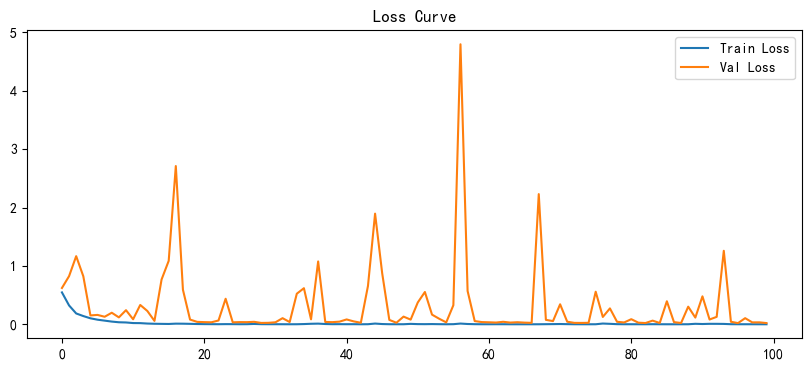

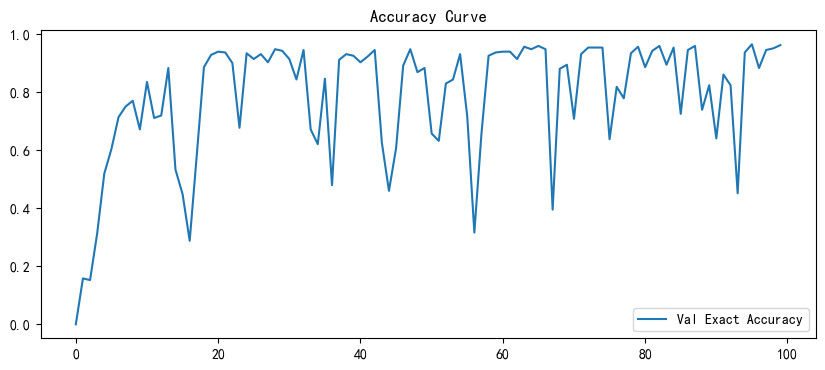


测试集整体准确率: 0.9663

每一类准确率：
Class 0: 0.9972
Class 1: 0.9888
Class 2: 1.0000
Class 3: 0.9803
Class 4: 1.0000
Class 5: 1.0000
Class 6: 0.9831
Class 7: 1.0000


In [35]:
# ================================
# 主程序入口
# ================================
if __name__ == "__main__":

    train_dataset = NPYDataset(r"D:\CODE_FIELD\CODE_Python/fault-diagnosis-method-research\ CSAM-MSCNN/train_x.npy", r"D:\CODE_FIELD\CODE_Python/fault-diagnosis-method-research\ CSAM-MSCNN/train_y.npy")
    val_dataset   = NPYDataset(r"D:\CODE_FIELD\CODE_Python/fault-diagnosis-method-research\ CSAM-MSCNN/val_x.npy", r"D:\CODE_FIELD\CODE_Python/fault-diagnosis-method-research\ CSAM-MSCNN/val_y.npy")
    test_dataset  = NPYDataset(r"D:\CODE_FIELD\CODE_Python/fault-diagnosis-method-research\ CSAM-MSCNN/test_x.npy", r"D:\CODE_FIELD\CODE_Python/fault-diagnosis-method-research\ CSAM-MSCNN/test_y.npy")

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader   = DataLoader(val_dataset,   batch_size=64, shuffle=False)
    test_loader  = DataLoader(test_dataset,  batch_size=64, shuffle=False)

    model = CSAM_MSCNN(num_classes=8)

    train_model(
        model,
        train_loader,
        val_loader,
        test_loader,
        epochs=100,
        lr=0.001
    )